# Calculating $R^2$ of kinked WLC for heterogenous linker lengths

In [1]:
%run init.ipy
%matplotlib inline

Using matplotlib backend: MacOSX


/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


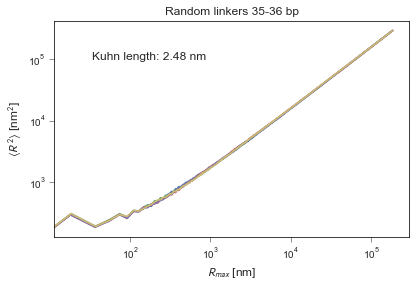

In [26]:
#Generate code to randomly sample between 35 and 36 bp linker lengths, 20 unwraps
plt.figure()
for i in range(5):
    links = np.random.randint(35, 37, 10000)
    r2, ldna, m = wlc.kinked_WLC_no_translation(links, 'blah', plotfig=False)
    plt.loglog(ldna, r2)
    plt.xlabel(r'$R_{max}$ [nm]')
    plt.ylabel(r'$\langle{R^2}\rangle$ [nm$^2$]')
    plt.title('Random linkers 35-36 bp')

plt.text(0.10, 0.80, f'Kuhn length: {np.mean(kuhns):.2f} nm', transform=ax.transAxes, size=12)
plt.subplots_adjust(bottom = 0.15, top = 0.9, left = 0.13, right = 0.95)
plt.savefig('RandomLinkers35to36bp.pdf')

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


Mean Kuhn length in nm: 2.49


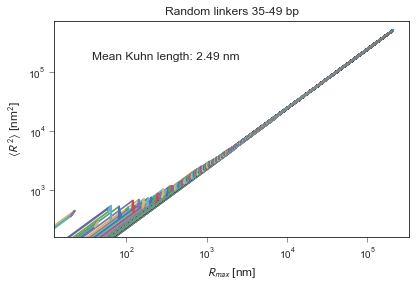

In [27]:
r2 = np.zeros((5, 10001))
kuhns = np.zeros(5)
ldna = np.zeros_like(r2)
for i in range(5):
    links = np.random.randint(35, 50, 10000)
    r2d, ldnad, kuhnsd = wlc.kinked_WLC_no_translation(links, 'blah', plotfig=False)
    r2[i, :] = r2d
    ldna[i, :] = ldnad
    kuhns[i] = kuhnsd

print(f'Mean Kuhn length in nm: {np.mean(kuhns):.2f}')

Above, we have 5 different chain realizations with random linkers between 35-49 bp (excluding unwrapping, which by default is set to 10 bp on either side, so total linker length is 55-69 bp). The kinks seem to eliminate the typical 2-slope bend you see in $R^2$ vs. $R_{max}$ curves (see below). The length scales where random linkers matter extends up to 1000 - 10,000 bp, which is a significant number of nucleosomes.

Mean Kuhn length in nm: 2.49


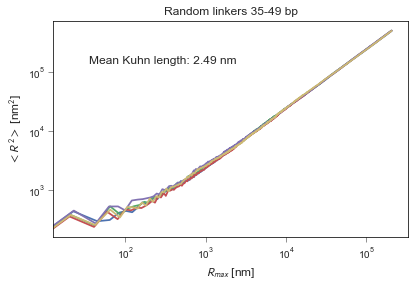

In [28]:
plt.figure()
ax = plt.subplot(111)
for i in range(5):
    plt.loglog(ldna[i,:], r2[i,:])

plt.xlabel('$R_{max}$ [nm]')
plt.ylabel('$<R^2>$ [nm$^2$]')
plt.text(0.10, 0.80, f'Mean Kuhn length: {np.mean(kuhns):.2f} nm', transform=ax.transAxes, size=12)
plt.title('Random linkers 35-49 bp')
plt.subplots_adjust(bottom = 0.15, top = 0.9, left = 0.13, right = 0.95)
plt.savefig('RandomLinkers35to50bp')
print(f'Mean Kuhn length in nm: {np.mean(kuhns):.2f}')

## 1. Test no kinks / no twist limits

For a normal WLC with no twist and no kinks, the analytical formula for $<R^2>$ is given by

\begin{equation*}
\langle{R^2}\rangle = 2l_pR_{max}(1 - \frac{l_p}{R_{max}}(1 - e^{-R_{max}/l_p})
\end{equation*}

Notice this formula has no dependence on the twist persistance length. To test against this formula, we set Euler angles for all kinks to be (0, 0, 0), resulting in a normal WLC.

Our plots are on a log-log scale. What does this mean?

In the ideal chain limit, $R_{max} >> l_p$, so $\langle{R^2}\rangle = 2l_pR_{max}$. Taking the log of both sides, we get $log(\langle{R^2}\rangle) = log(R_{max}) + log(2l_p)$. Thus, in the long chain limit, the slope of the log-log plot will always be 1, and the persistance length can be extracted from the intercept.

In the rigid rod limit, $R_{max} << l_p$, so $\langle{R^2}\rangle = R_{max}^2$. But this is for a normal worm-like chain (our kinked chain won't necessarily follow this behavior).


99.99999999987843


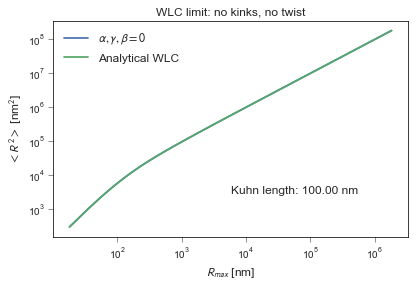

In [2]:
#Hard code euler angles=0 to test agreement with normal WLC (no kinks, totally straight polymer)
%matplotlib inline

def r2wlc(ldna, lp):
    """Analytical formula for R^2 of WLC."""
    return 2*(lp*ldna - lp**2 + lp**2*np.exp(-ldna/lp))

links = 35*np.ones(100000)
r2nokinks, ldnanokinks, mnokinks = wlc.kinked_WLC_no_translation(links, lt=0.01*wlc.default_lt)
print(mnokinks)
r2theory = r2wlc(ldnanokinks, wlc.default_lp*ncg.dna_params['lpb'])

plt.figure()
ax = plt.subplot(111)
plt.loglog(ldnanokinks, r2theory)
plt.loglog(ldnanokinks, r2nokinks)

plt.legend([r'$\alpha, \gamma, \beta = 0$', 'Analytical WLC'])
plt.xlabel('$R_{max}$ [nm]')
plt.ylabel('$<R^2>$ [nm$^2$]')
plt.text(0.5, 0.2, f'Kuhn length: {mnokinks:.2f} nm', transform=ax.transAxes, size=12)
plt.title('WLC limit: no kinks, no twist')
plt.subplots_adjust(bottom = 0.15, top = 0.9, left = 0.13, right = 0.95)
plt.savefig('R2_no_kinks_35bplinkers.pdf')

[0.332 0.664 0.996 1.328 1.66 ]


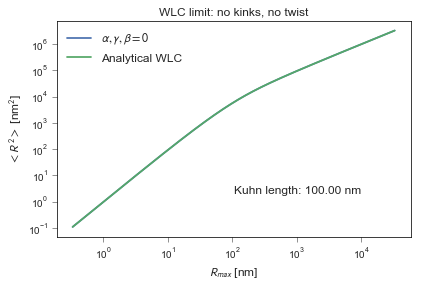

In [4]:
#try adding more data points by discretizing by 1 bp, instead of by 35
links = np.ones(100000)
r2tw, ldna, m = wlc.kinked_WLC_no_translation(links, unwraps=0)
r2theory = r2wlc(ldna, wlc.default_lp*ncg.dna_params['lpb'])

print(ldna[0:5])
plt.figure()
ax = plt.subplot(111)
plt.loglog(ldna, r2theory)
plt.loglog(ldna, r2tw)
plt.legend([r'$\alpha, \gamma, \beta = 0$', 'Analytical WLC'])
plt.xlabel('$R_{max}$ [nm]')
plt.ylabel('$<R^2>$ [nm$^2$]')
plt.text(0.5, 0.2, f'Kuhn length: {mnokinks:.2f} nm', transform=ax.transAxes, size=12)
plt.title('WLC limit: no kinks, no twist')
plt.subplots_adjust(bottom = 0.15, top = 0.9, left = 0.13, right = 0.95)
plt.savefig('R2_no_kinks_1bplinkers.pdf')

When we put in 1 bp long linkers with Euler angles set to 0 for the kink, we find that as expected, the M matrices are just the identity. I also printed out the g matrices and they match my analytical expectations.

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:222: RuntimeWarning: divide by zero encountered in log
  m = stats.linregress(np.log(lengthDNA)[5000:], np.log(r2)[5000:])[0]


1.000294989534106


Text(24.0621,0.5,'$<R^2>$')

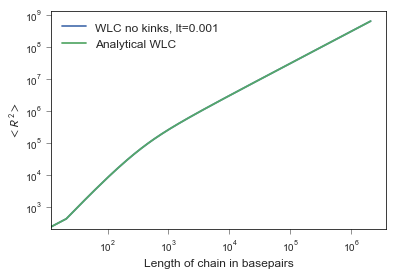

In [5]:
links = np.ones(100000)
#crank down the twist persistence length 
r2p, ldna, m = wlc.kinked_WLC_no_translation(links, 'R2_no_kinks_Lt0.001_1bp_linkers.pdf', lt=0.001)
print(m)
r2theory = r2wlc(ldna, wlc.default_lp)
plt.loglog(ldna, r2theory)
plt.legend(['WLC no kinks, lt=0.001', 'Analytical WLC'])
plt.xlabel('Length of chain in basepairs')
plt.ylabel(r'$<R^2>$')

Cranking down the twist persistance length doesn't change anything. This is to be expected because there is no twist-bend coupling. Without kinks, twist doesn't change $R^2$, which only depends on the tangent vector and not the normal vectors (which are the only ones that get rotated by twist, and therefore the only ones that are affected by the twist persistance length).

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:222: RuntimeWarning: divide by zero encountered in log
  m = stats.linregress(np.log(lengthDNA)[5000:], np.log(r2)[5000:])[0]


1.000294989534106


Text(24.0621,0.5,'$<R^2>$')

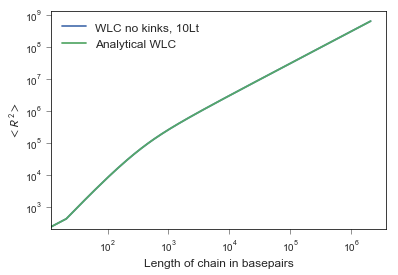

In [6]:
links = np.ones(100000)
#crank down the twist persistence length 
r2p, ldna, m = wlc.kinked_WLC_no_translation(links, 'R2_no_kinks_10Lt_1bp_linkers.pdf', lt=10*wlc.default_lt)
print(m)
r2theory = r2wlc(ldna, wlc.default_lp)
plt.loglog(ldna, r2theory)
plt.legend(['WLC no kinks, 10Lt', 'Analytical WLC'])
plt.xlabel('Length of chain in basepairs')
plt.ylabel(r'$<R^2>$')

Neither does cranking up the twist persistence length...

## 2. Test rigid rod limit.

In the rigid rod limit, $l_p$ and $l_t$ go to infinity, so only term in Hamiltonian is $-i\tau\frac{\partial}{\partial \psi}$. In this limit (no fluctuations), $\langle{R^2}\rangle$ should match the pure geometric picture.

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


Kuhn length in bp for 10Lt: 2.55
Kuhn length in bp for .01Lt: 2.28


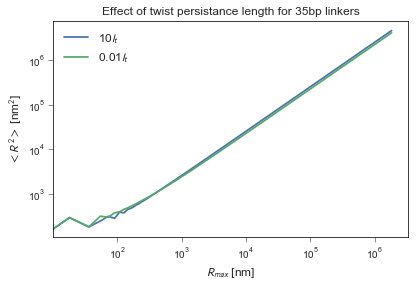

In [3]:
links = 35*np.ones(100000)
r2p, ldnap, mp = wlc.kinked_WLC_no_translation(links, 'R2_kinks_10Lt_35bp_linkers.pdf', plotfig=False, lt=10*wlc.default_lt)
r2t, ldnat, mt = wlc.kinked_WLC_no_translation(links, 'R2_kinks_0.01Lt_35bp_linkers.pdf', plotfig=False, lt=0.01*wlc.default_lt)
print(f'Kuhn length in bp for 10Lt: {mp:.2f}')
print(f'Kuhn length in bp for .01Lt: {mt:.2f}')

plt.figure()
ax = plt.subplot(111)
plt.loglog(ldnap, r2p)
plt.loglog(ldnat, r2t)
plt.legend(['10$l_t$', '0.01$l_t$'])
plt.xlabel('$R_{max}$ [nm]')
plt.ylabel('$<R^2>$ [nm$^2$]')
plt.title('Effect of twist persistance length for 35bp linkers')
plt.subplots_adjust(bottom = 0.15, top = 0.9, left = 0.13, right = 0.95)
plt.savefig('R2_kinks_35bplinkers_10lt_0.01lt.pdf')

The above plot confirms that changing the twist persistance length DOES matter for the kinked chain. Here, default $l_t$ is set to be 100 nm, whereas default $l_p$ is 50 nm.

In [4]:
#Now let's generate R^2 for 
links = 35*np.ones(100000)
rots, pos = ncg.minimum_energy_no_sterics_linker_only(links)

Text(0,0.5,'$\\langle{R^2}\\rangle$ [nm$^2$]')

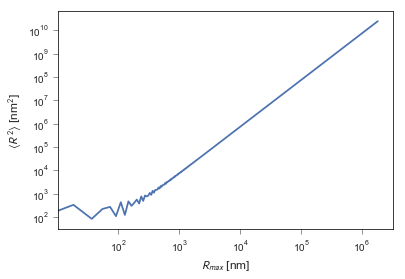

In [5]:
#calculate R^2 in nm
r2 = np.array([np.linalg.norm(pos[i, :] - pos[0, :])**2 for i in range(pos.shape[0])])
ldna = np.array([i*55 for i in range(len(r2))]) * ncg.dna_params['lpb'] 

plt.loglog(ldna, r2)
plt.xlabel(r'$R_{max}$ [nm]')
plt.ylabel(r'$\langle{R^2}\rangle$ [nm$^2$]')

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


Kuhn length in nm: 971.54


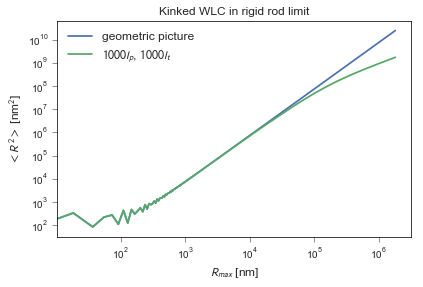

In [6]:
#compare against fluctuation code with high persistance length and high twist persistance length
plt.figure()
plt.loglog(ldna, np.array(r2))
plt.xlabel('$R_{max}$ [nm]')
plt.ylabel('$<R^2>$ [nm$^2$]')

r2rr, ldnarr, m = wlc.kinked_WLC_no_translation(links, 'blah', plotfig=False, lp=1000*wlc.default_lp,
                                             lt=1000*wlc.default_lt)
print(f'Kuhn length in nm: {m:.2f}')
plt.loglog(ldnarr, r2rr)
plt.legend(['geometric picture', '$1000l_p$, $1000l_t$'])
plt.title('Kinked WLC in rigid rod limit')
plt.subplots_adjust(bottom = 0.15, top = 0.9, left = 0.13, right = 0.95)
plt.savefig('R2_rigid_rod_limit_35bplinkers.pdf')

In [12]:
ldnarr[1000]

18260.0

In [36]:
#seems to be off. try re-scaling twist density by 0.9
links = 35*np.ones(100000)
rots, pos = ncg.minimum_energy_no_sterics_linker_only(links, tau_d=ncg.dna_params['tau_d'])

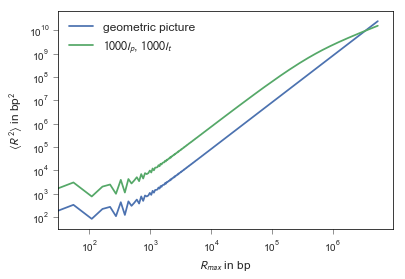

In [37]:
r2 = [np.linalg.norm(pos[i, :] - pos[0, :])**2 for i in range(pos.shape[0])]
ldna = [i*55 for i in range(len(r2))]
plt.loglog(ldna, r2)
plt.xlabel(r'$R_{max}$ in bp')
plt.ylabel(r'$\langle{R^2}\rangle$ in bp$^2$')
plt.loglog(ldnarr, r2rr)
plt.legend(['geometric picture', '$1000l_p$, $1000l_t$'])

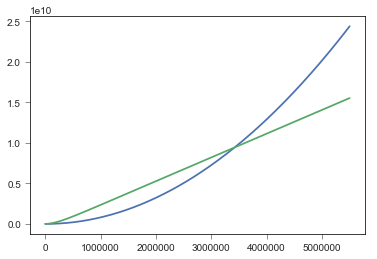

In [38]:
#in linear space
plt.plot(ldna, r2)
plt.plot(ldnarr, r2rr)

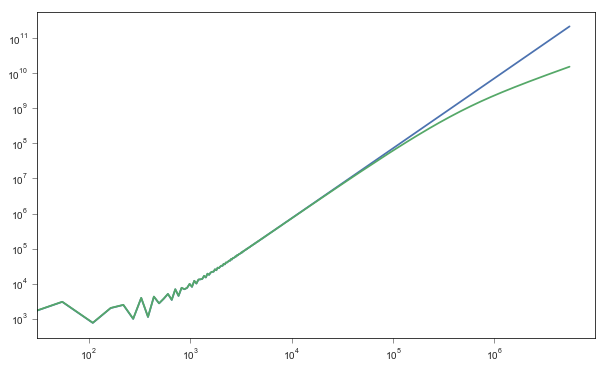

In [46]:
plt.figure(figsize=(10,6))
plt.loglog(ldna, 9*np.array(r2))
plt.loglog(ldnarr, 1*r2rr)

## Effect of Heterogenous Linkers on Kuhn length

Next, we compare our heterogenous kinked chain to kinked chains with fixed linkers.

In [7]:
#First calculate Kuhn length as a function of linker length
links_35to50 = np.arange(35, 50)
kuhns_35to50 = np.zeros_like(links_35to50)
for i in range(len(links_35to50)):
    linkers = np.tile(links_35to50[i], 100000)
    r2, ldna, kuhn = wlc.kinked_WLC_no_translation(linkers, 'blah', plotfig=False)
    kuhns_35to50[i] = kuhn

mean_kuhn_35to50 = np.tile(np.mean(kuhns_35to50), len(links_35to50))

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


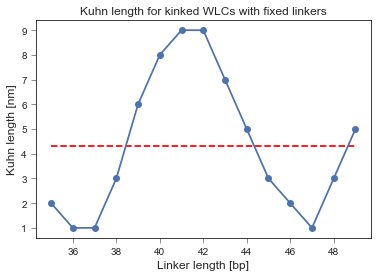

In [9]:
plt.plot(links_35to50, mean_kuhn_35to50, 'r--')
plt.plot(links_35to50, kuhns_35to50, '-o')
plt.xlabel('Linker length [bp]')
plt.ylabel('Kuhn length [nm]')
plt.title('Kuhn length for kinked WLCs with fixed linkers')
plt.savefig('kuhn_length_vs_linkers35to49bp_default_unwrapping.pdf')

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


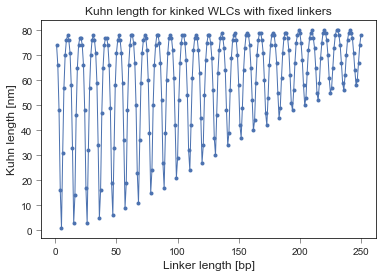

In [3]:
#First calculate Kuhn length as a function of linker length with no unwrapping
links = np.arange(1, 251)
kuhns = np.zeros_like(links)
for i in range(len(links)):
    linkers = np.tile(links[i], 100000)
    r2, ldna, kuhn = wlc.kinked_WLC_no_translation(linkers, 'blah', plotfig=False, unwraps=0)
    kuhns[i] = kuhn

plt.plot(links, kuhns, '-o', markersize=4, linewidth=1)
plt.xlabel('Linker length [bp]')
plt.ylabel('Kuhn length [nm]')
plt.title('Kuhn length for kinked WLCs with fixed linkers')
plt.savefig('kuhn_length_vs_linkers1to250bp_no_unwrapping.pdf')

/Users/deepti/Documents/Spakowitz/nuc_chain/nuc_chain/fluctuations.py:39: RuntimeWarning: invalid value encountered in sqrt
  al  = lambda l, j: np.sqrt((l-j)*(l+j)/(4*l**2 - 1)) #ladder coefficients alpha


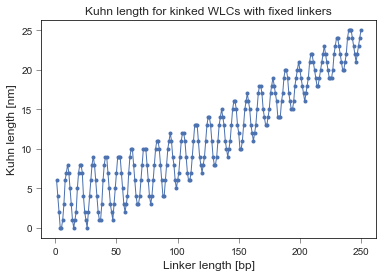

In [10]:
#First calculate Kuhn length as a function of linker length with default unwrapping (10 bp on each side)
links_wrap = np.arange(1, 251)
kuhns_wrap = np.zeros_like(links_wrap)
for i in range(len(links_wrap)):
    linkers = np.tile(links_wrap[i], 100000)
    r2, ldna, kuhn = wlc.kinked_WLC_no_translation(linkers, 'blah', plotfig=False)
    kuhns_wrap[i] = kuhn

plt.plot(links_wrap, kuhns_wrap, '-o', markersize=4, linewidth=1)
plt.xlabel('Linker length [bp]')
plt.ylabel('Kuhn length [nm]')
plt.title('Kuhn length for kinked WLCs with fixed linkers')
plt.savefig('kuhn_length_vs_linkers1to250bp_default_unwrapping.pdf')

As expected, the Kuhn length is 10.5 bp periodic with linker length. The average Kuhn length increases linearly with linker length (just as it does in the freely jointed case). In addition as the linkers get longer, the variation in Kuhn length due to the 10.5 bp-periodic kinks reduces (which makes sense).

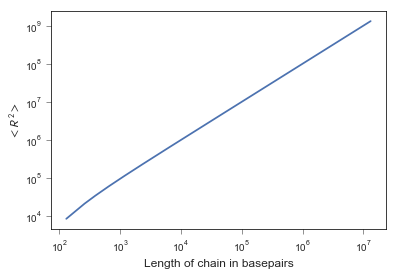

In [15]:
#first check if index 5000 is a fair number to use for this wide range of linker lengths
linkers = np.tile(250, 100000)
r2, ldna, kuhn = wlc.kinked_WLC_no_translation(linkers, 'R2_250bp_linkers.pdf', plotfig=True, unwraps=145)

[ 395.  790. 1185. 1580. 1975.]
99.89389432611321


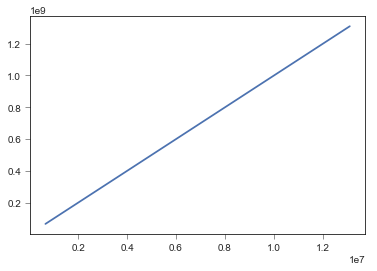

In [16]:
print(ldna[0:5]/ncg.dna_params['lpb'])
print(kuhn)
plt.plot(ldna[5000:], r2[5000:])

## Decoding relationship between fixed linker chains and heterogenous chains

__Hypothesis 1:__

According to "Exact theory of kinkable elastic polymers" by Wiggins and Nelson,
\begin{equation*}
\frac{1}{\xi_{eff}} = \frac{1}{\xi} + \frac{1}{\xi_{kink}}
\end{equation*}

where $\xi_{kink} = \zeta^{-1}$, and $\zeta$ is the kink density. I tried this formula using $\zeta$ =1/(linker length) but it didn't match the Kuhn lengths I was getting for chains with fixed linkers. This is because Wiggins/Nelson's model included an energy associated with the kink, whereas in our case the kink is determined.

__Hypothesis 2: Andy's guess__

\begin{equation*}
\frac{1}{\xi_{eff}} = \langle{\frac{1}{\xi}}\rangle = \frac{1}{N}\sum{\frac{1}{\xi_i}}
\end{equation*}

where N is the number of unique linker lengths and $\xi_i$ is the persistance length for the kinked chain corresponding to each of the fixed linker lengths. Turns out this formula works pretty darn well!

In [18]:
#determine kink densities for linkers 35 to 50 bp with default wrapping
#kink density is number of kinks per unit length (aka 1/linker length)

links_35to50_nm = links_35to50 * ncg.dna_params['lpb']
eff_kuhns_35to50 = 2*((1/50.) + (1/links_35to50_nm))**(-1)
print(eff_kuhns_35to50)
print(kuhns_35to50)

[18.85751379 19.29235537 19.72256117 20.14820493 20.56935884 20.98609355
 21.39847827 21.80658076 22.21046736 22.61020307 23.00585156 23.39747518
 23.78513505 24.16889105 24.54880183]
[2 1 1 3 6 8 9 9 7 5 3 2 1 3 5]


In [19]:
#ahh this sort of matches Andy's formula!!!
print(np.mean(1/kuhns_35to50)**(-1))

2.476577343903558


In [20]:
#doesn't work for 35 vs 36 bp though
print(np.mean(1/kuhns_35to50[0:2])**(-1))

1.3333333333333333


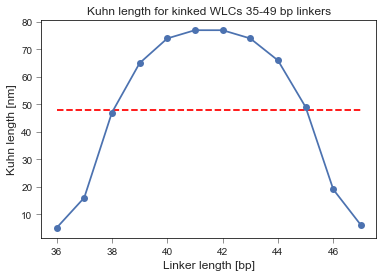

In [26]:
mean_kuhn_35to50_no_unwrap = np.tile(np.mean(kuhns[35:47]), len(links[35:47]))
plt.plot(links[35:47], mean_kuhn_35to50_no_unwrap, 'r--')
plt.plot(links[35:47], kuhns[35:47], '-o')
plt.xlabel('Linker length [bp]')
plt.ylabel('Kuhn length [nm]')
plt.title('Kuhn length for kinked WLCs 36-47 bp linkers')
plt.savefig('kuhn_length_vs_linkers36to47bp_no_unwrapping.pdf')

In [18]:
r2_36to47_no_unwrap = np.zeros((10, 10000))
kuhns_36to47_no_unwrap = np.zeros(10)
ldna_36to47_no_unwrap = np.zeros_like(r2_36to47_no_unwrap)
for i in range(10):
    links = np.random.randint(36, 48, 10000)
    r2d, ldnad, kuhnsd = wlc.kinked_WLC_no_translation(links, 'blah', plotfig=False, unwraps=0)
    r2_36to47_no_unwrap[i, :] = r2d
    ldna_36to47_no_unwrap[i, :] = ldnad
    kuhns_36to47_no_unwrap[i] = kuhnsd

print(f'Mean Kuhn length in nm: {np.mean(kuhns_36to47_no_unwrap):.2f}')

Mean Kuhn length in nm: 23.53


In [19]:
#try Andy's formula on this distribution of linker lengths (no unwrapping)
print(np.mean(1/kuhns[35:47])**(-1))

NameError: name 'kuhns' is not defined

It works!!!!